# Titanic: Machine Learning from Disaster
Predict survival on the Titanic and get familiar with ML basics

Importing the data sets and the pandas library

In [40]:
import pandas as pd

test = pd.read_csv("../test.csv")
train = pd.read_csv("../train.csv")

In [41]:
test.shape

(418, 11)

In [42]:
train.shape

(891, 12)

In [43]:
train.columns #inspecting the data set & data dictionary below

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

PassengerID— A column added by Kaggle to identify each row and make submissions easier

Survived— Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)

Pclass—	The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)

Sex— The passenger’s sex

Age— The passenger’s age in years

SibSp— The number of siblings or spouses the passenger had aboard the Titanic

Parch— The number of parents or children the passenger had aboard the Titanic

Ticket— The passenger’s ticket number

Fare— The fare the passenger paid

Cabin— The passenger’s cabin number

Embarked— The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
# We need to predict whether passengers survived or not. 
# We'll approach this as a Machine Learn Classification problem.
# Let's explore the data set to understand a bit more about what happend

In [46]:
# importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [47]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

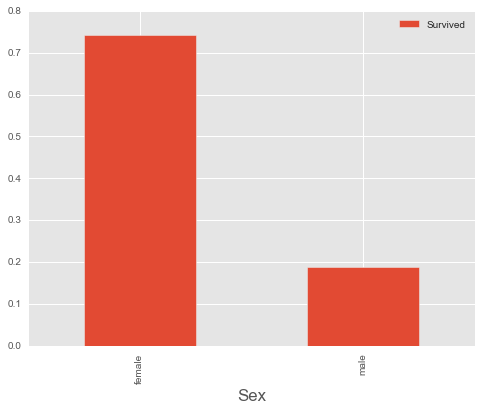

In [48]:
# 74.2% of people who survivved were female and 18.9% were men
sex_pivot = train.pivot_table(index='Sex', values='Survived')
sex_pivot.plot.bar()
plt.show()

In [49]:
sex_pivot

,Survived
Sex,
female,0.742038
male,0.188908


In [50]:
sibsp_pivot = train.pivot_table(index='SibSp', values = "Survived")
sibsp_pivot

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [51]:
train.pivot_table(values='Survived', index= "SibSp", columns = 'Sex')

Sex,female,male
SibSp,,
0,0.787356,0.168203
1,0.754717,0.310680
2,0.769231,0.200000
3,0.363636,0.000000
4,0.333333,0.083333
5,0.000000,0.000000
8,0.000000,0.000000


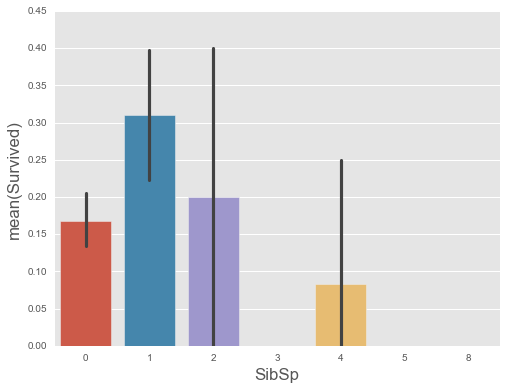

In [52]:
men = train.loc[train['Sex'] == 'male', :].copy()
women = train.loc[train['Sex'] == 'female', :].copy()
sns.barplot(x=men.SibSp, y=train.Survived)

In [53]:
train['maleSibSp'] = ((train.Sex == 'male') & (train.SibSp == 0)).astype('int')
test['maleSibSp'] = ((test.Sex == 'male') & (test.SibSp == 0)).astype('int')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,maleSibSp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


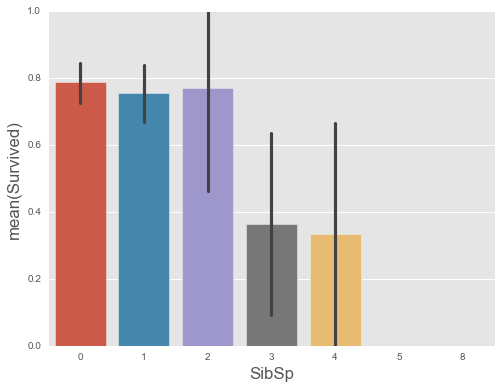

In [54]:
sns.barplot(x=women.SibSp, y=train.Survived)

In [55]:
Parch_pivot = train.pivot_table(values='Survived', index= "Parch", columns = 'Sex')
Parch_pivot

Sex,female,male
Parch,,
0,0.788660,0.165289
1,0.766667,0.327586
2,0.612245,0.322581
3,0.750000,0.000000
4,0.000000,0.000000
5,0.250000,0.000000
6,0.000000,NaN


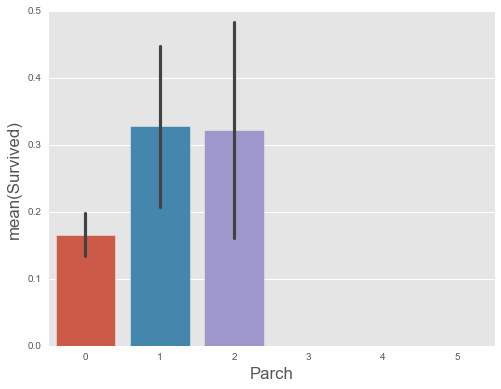

In [56]:
sns.barplot(x=men.Parch, y=train.Survived)

In [57]:
train['maleParch'] = ((train.Sex == 'male') & (train.Parch == 0)).astype('int')
test['maleParch'] = ((test.Sex == 'male') & (test.Parch == 0)).astype('int')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,maleSibSp,maleParch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [58]:
class_pivot = train.pivot_table(index='Pclass', values='Survived')
class_pivot

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


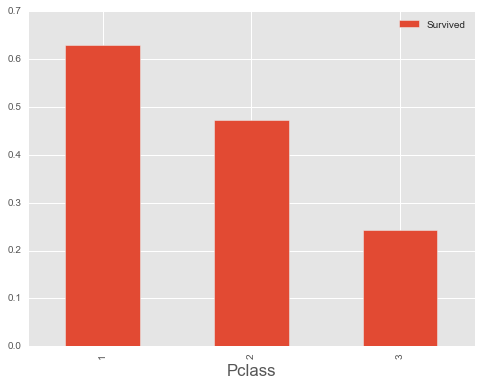

In [59]:
# We can see differences between the classes too
class_pivot.plot.bar()

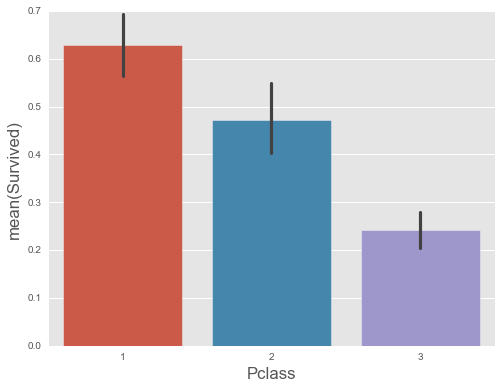

In [60]:
sns.barplot(x=train.Pclass, y=train.Survived)

In [61]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

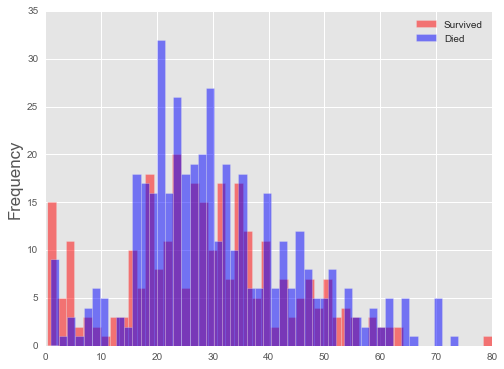

In [62]:
survived = train[train['Survived'] == 1]
died = train[train['Survived'] == 0]
survived['Age'].plot.hist(alpha = 0.5, color = 'red', bins = 50)
died['Age'].plot.hist(alpha = 0.5, color = 'blue', bins = 50)
plt.legend(['Survived', 'Died'])

In [63]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)


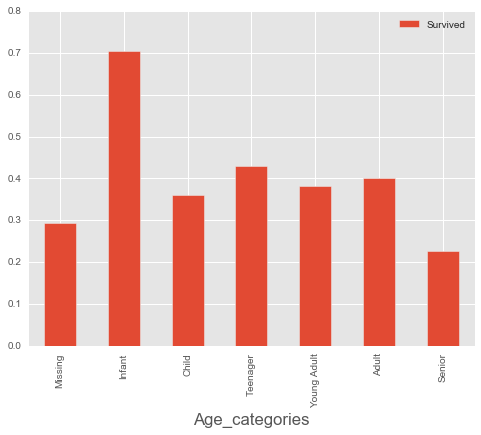

In [64]:
pivot = train.pivot_table(index = 'Age_categories', values = 'Survived')
pivot.plot.bar()

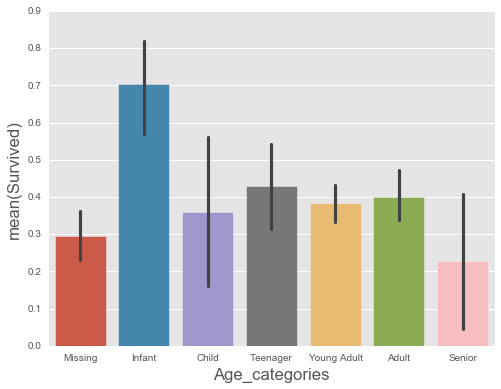

In [65]:
sns.barplot(x=train.Age_categories, y=train.Survived)

In [66]:
train = pd.get_dummies(data=train, columns=['Pclass', 'Sex', 'Age_categories'],
              drop_first=True)

test = pd.get_dummies(data=test, columns=['Pclass', 'Sex', 'Age_categories'],
              drop_first=True)

In [67]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,maleParch,Pclass_2,Pclass_3,Sex_male,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,...,1,0,1,1,0,0,0,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,...,0,0,0,0,0,0,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,...,0,0,1,0,0,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,...,0,0,0,0,0,0,0,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,...,1,0,1,1,0,0,0,1,0,0


In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [70]:
columns = ['Pclass_2', 'Pclass_3', 'Sex_male', 'maleParch', 'maleSibSp',
           'Age_categories_Infant','Age_categories_Child', 
           'Age_categories_Teenager','Age_categories_Young Adult',
           'Age_categories_Adult', 'Age_categories_Senior']

lr.fit(train[columns], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
holdout = test # from now on we will refer to this
               # dataframe as the holdout data

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)

In [73]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [74]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)

In [75]:
print(accuracy)

0.787709497207


In [76]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[ 0.76404494  0.76404494  0.7752809   0.78651685  0.8         0.80681818
  0.80898876  0.83146067  0.83333333  0.88764045]
0.805812904324


In [77]:
lr = LogisticRegression()
lr.fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[columns])

In [40]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                "Survived":  holdout_predictions}
submission = pd.DataFrame(submission_df)
submission.to_csv("submission.csv", index=False)